# Explore the SAT test in NYC

The SAT, or Scholastic Aptitude Test, is a test that high schoolers take in the US before applying to college. Colleges take the test scores into account when making admissions decisions, so it's fairly important to do well on. The test is divided into 3 sections, each of which is scored out of 800 points. The total score is out of 2400 (although this has changed back and forth a few times, the scores in this dataset are out of 2400). High schools are often ranked by their average SAT scores, and high SAT scores are considered a sign of how good a school district is.

Combine 7 related datasets together. Datasets descriptions can be found in Readme. Briefly, the datasets we use are listed as follows:

1. [_SAT results_](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) - contains average SAT scores on the three subjects by each school and the number of SAT takers. 

2. [_High School Directory_](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2) - contains information of each high school.

3. [_Math test results_](https://data.cityofnewyork.us/Education/2006-2011-NYS-Math-Test-Results-By-Grade-School-Le/jufi-gzgp) contains math test results for each school.

4. [_Class size_](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - class size of each high school.

5. [_AP test results_](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) - Advanced Placement exam results for each high school. Passing AP exams can get you college credit in the US.

6. [_Graduation outcomes_](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) - percentage of graduated students and other outcome information.

7. [_Demographics and accountability_](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) - demographic information for each school.

8. [_School district maps_](https://data.cityofnewyork.us/Education/School-Districts/r8nu-ymqj) - contains information on the layout of the school districts, so that we can map them out.

9. [_School survey_](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - surveys of parents, teachers, and students at each school (scores).

Showcase:
- Data cleaning
- Data wrangling
- Data preprocessing
- Mapping and visulization
- Insights

## Understanding the data

We first do a quick look at the data, i.e. what contains in each file. We read in all files and see what attributes are in each dataset.

In [1]:
import pandas as pd
import numpy as np

files = ['ap_college_board.csv', 'class_size.csv',
         'demographics_and_accountability.csv',
        'graduation_outcomes.csv', 'high_school_directory.csv', 
         'math_test_results.csv', 'sat_results.csv']

data = {}
for f in files:
    d = pd.read_csv("data/{}".format(f))
    data[f.replace(".csv", "")] = d

In [2]:
for k,v in data.items():
    print("\n"+k+"\n")
    print(v.head(5))


ap_college_board

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  

class_size

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemen

## Combine Files into 1 Single Dataset
DBN column appears in all the datasets, it is a unique code for each school in NYC.
The problem now is that two of the datasets, class_size, and hs_directory, don't have a DBN field. In the high_school_directory data, it's just named dbn, so we can just rename the column, or copy it over into a new column called DBN. In the class_size data, we'll need to try a different approach.

Most DBN in the dataset looks like "01M448". For example:

In [3]:
data["ap_college_board"]["DBN"].head(3)

0    01M448
1    01M450
2    01M515
Name: DBN, dtype: object

Although the class_size dataset does not contain the DBN columnn, it has certain columns that can be used to build a DBN column. Let's look at the columns in class_size. The first 3 columns are just what we need. 

In [4]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


Now we have enough information to build the DBN columns for class_size and high_school_directory. We add a new column DBN to these two datasets.

In [5]:
data["class_size"]["DBN"] = (data["class_size"].apply
                             (lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis = 1))
data["high_school_directory"]["DBN"] = data["high_school_directory"]["dbn"]

## Adding in the survey data.

Student, parent, and teacher suverys about the quality of schools.

One of the most potentially interesting datasets to look at is the dataset on student, parent, and teacher surveys about the quality of schools. These surveys include information about the perceived safety of each school, academic standards, and more. Before we combine our datasets, let's add in the survey data.

In this case, we'll add the survey data into our data dictionary, and then combine all the datasets afterwards. The survey data consists of 2 files, one for all schools, and one for school district 75. 


In [6]:
survey1 = pd.read_excel("data/survey_all.xlsx", sheet_name = 'Sheet1')
survey2 = pd.read_excel("data/survey_d75.xlsx", sheet_name = 'Sheet1')
print(survey1.head())
print(survey2.head())

      dbn                    sch_type                        location  \
0  01M015           Elementary School       P.S. 015 Roberto Clemente   
1  01M019           Elementary School             P.S. 019 Asher Levy   
2  01M020           Elementary School            P.S. 020 Anna Silver   
3  01M034  Elementary / Middle School  P.S. 034 Franklin D. Roosevelt   
4  01M063           Elementary School       P.S. 063 William McKinley   

   enrollment    borough              principal studentsurvey  rr_s  rr_t  \
0         198  MANHATTAN        Thomas Staebell            No   NaN    93   
1         286  MANHATTAN    JACQUELINE FLANAGAN            No   NaN    69   
2         539  MANHATTAN              James Lee            No   NaN    59   
3         396  MANHATTAN  Joyce Stallings Harte           Yes  91.0    48   
4         172  MANHATTAN     DARLENE DESPEIGNES            No   NaN    55   

   rr_p     ...      s_N_q14e_3  s_N_q14e_4  s_N_q14f_1  s_N_q14f_2  \
0    63     ...            

In [7]:
survey1["d75"] = False
survey2["d75"] = True
survey = pd.concat([survey1, survey2], axis = 0, sort = False)
print(survey1.shape)
print(survey2.shape)
print(survey.shape)
survey.head()

(1597, 1977)
(56, 1801)
(1653, 2852)


,dbn,sch_type,location,enrollment,borough,principal,studentsurvey,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,Elementary School,P.S. 015 Roberto Clemente,198,MANHATTAN,Thomas Staebell,No,NaN,93,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,Elementary School,P.S. 019 Asher Levy,286,MANHATTAN,JACQUELINE FLANAGAN,No,NaN,69,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,Elementary School,P.S. 020 Anna Silver,539,MANHATTAN,James Lee,No,NaN,59,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,Elementary / Middle School,P.S. 034 Franklin D. Roosevelt,396,MANHATTAN,Joyce Stallings Harte,Yes,91.0,48,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,Elementary School,P.S. 063 William McKinley,172,MANHATTAN,DARLENE DESPEIGNES,No,NaN,55,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Too many columns are in the survey data, and most of them are extraneous. By looking at the column dictionary of the survey data, let's just keep the important fields and remove any extraneous columns. 

In [8]:
import warnings
warnings.filterwarnings('ignore')
survey["DBN"] = survey["dbn"]
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_10", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11",]
survey = survey.loc[:,survey_fields]
data["survey"] = survey
survey.shape

(1653, 23)

## Condensing data, more preprocessing

The datasets such as *class_size*, demographics_and_accountabilities, have multiple rows for each school, whereas the datasets such as *sat_results* and *high_school_directory* only has one row per school. We need to find a way to combine these datasets together. For example:


In [9]:
print(data["demographics_and_accountability"].head())
print(data["class_size"].head())

      DBN                       Name  schoolyear fl_percent  frl_percent  \
0  01M015  P.S. 015 ROBERTO CLEMENTE    20052006       89.4          NaN   
1  01M015  P.S. 015 ROBERTO CLEMENTE    20062007       89.4          NaN   
2  01M015  P.S. 015 ROBERTO CLEMENTE    20072008       89.4          NaN   
3  01M015  P.S. 015 ROBERTO CLEMENTE    20082009       89.4          NaN   
4  01M015  P.S. 015 ROBERTO CLEMENTE    20092010                    96.5   

   total_enrollment prek   k grade1 grade2    ...     black_num black_per  \
0               281   15  36     40     33    ...            74      26.3   
1               243   15  29     39     38    ...            68      28.0   
2               261   18  43     39     36    ...            77      29.5   
3               252   17  37     44     32    ...            75      29.8   
4               208   16  40     28     32    ...            67      32.2   

  hispanic_num hispanic_per white_num white_per male_num male_per female_num  \


In [10]:
print(data["sat_results"].head())
print(data["high_school_directory"].head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In order to concatenate these datasets into 1 dataset, we need to make every data set contains only one row per school. If not, we cannnot compare SAT results to the class size. We can accomplish this by first understanding the data better, then by doing some aggregation. With the class_size dataset, it looks like GRADE and PROGRAM TYPE have multiple values for each school. By restricting each field to a single value, we can filter most of the duplicate rows. In the below code, we:

- Only select values from class_size where the GRADE field is 09-12.
- Only select values from class_size where the PROGRAM TYPE field is GEN ED.
- Group the class_size dataset by DBN, and take the average of each column. -Essentially, we'll find the average class_size values for each school.
- Reset the index, so DBN is added back in as a column.

In [11]:
class_size = data["class_size"]
# we only keep the high school data, which is grade 9 to 12 with general education
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

#the aggregation by mean will drop non-numerical columns
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

In [12]:
# condensing the demographics_and_accountability dataset
# we choose the school year of 20112012
demographics_and_accountability = data["demographics_and_accountability"]
demographics_and_accountability = demographics_and_accountability[demographics_and_accountability["schoolyear"] == 20112012]
data["demographics_and_accountability"] = demographics_and_accountability


In [13]:
#condensing the math_test_results dataset
# we choose the year of 2011, and Grade 8
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Year"] == 2011]
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Grade"] == '8']
data["math_test_results"].head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
111,01M034,8,2011,All Students,48,646,15,31.3%,22,45.8%,11,22.9%,0,0%,11,22.9%
280,01M140,8,2011,All Students,61,665,1,1.6%,43,70.5%,17,27.9%,0,0%,17,27.9%
346,01M184,8,2011,All Students,49,727,0,0%,0,0%,5,10.2%,44,89.8%,49,100%
388,01M188,8,2011,All Students,49,658,10,20.4%,26,53.1%,10,20.4%,3,6.1%,13,26.5%
411,01M292,8,2011,All Students,49,650,15,30.6%,25,51%,7,14.3%,2,4.1%,9,18.4%


In [14]:
# condesing the graduation_outcomes dataset
data["graduation_outcomes"] = data["graduation_outcomes"][data["graduation_outcomes"]["Cohort"] == "2006"]
data["graduation_outcomes"] = data["graduation_outcomes"][data["graduation_outcomes"]["Demographic"] == "Total Cohort"]
data["graduation_outcomes"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


## Feature engineering

For the sat_results dataset, we add a new column to compute sat_score to store the total score of 'SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score'

In [15]:
cols = ['SAT Math Avg. Score', 
        'SAT Critical Reading Avg. Score', 
        'SAT Writing Avg. Score']
# convert string to numerical data
for c in cols:
    data["sat_results"][c] = data["sat_results"][c].convert_objects(convert_numeric = True)

data["sat_results"]["sat_score"] = (data["sat_results"][cols[0]]+
                                    data["sat_results"][cols[1]]+
                                    data["sat_results"][cols[2]])
data["sat_results"]["sat_score"].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

Now, we are finding the coordinates of each school so that we can make maps. The coordinates can be parsed out from the "Location 1" column in the high_school_directory dataset.

In [16]:
data["high_school_directory"]['latitude'] = data["high_school_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(","").replace(")","").split(", ")[0])
data["high_school_directory"]['longitude'] = data["high_school_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(","").replace(")","").split(", ")[1])
# convert string to numerical data
for c in ["latitude", "longitude"]:
    data["high_school_directory"][c] = data["high_school_directory"][c].convert_objects(convert_numeric = True)
    
print(data["high_school_directory"]['latitude'].head())
print(data["high_school_directory"]['longitude'].head())

0    40.670299
1    40.827603
2    40.842414
3    40.710679
4    40.718810
Name: latitude, dtype: float64
0   -73.961648
1   -73.904475
2   -73.916162
3   -74.000807
4   -73.806500
Name: longitude, dtype: float64


We have done the preliminaries now. Let's see what are in each dataset.

In [17]:
for k,v in data.items():
    print("\n"+k+"\n")
    print(v.head())


ap_college_board

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  

class_size

      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000          

## Combining all datasets together

From the above display, we see that each dataset has a column of "DBN". We can use this column to combine all datasets into one. 

### Handle missing values during combining

When we join them, it's important to note that some of the datasets are missing high schools that exist in the sat_results dataset. To resolve this, we'll need to merge the datasets that have missing rows using the __outer__ join strategy, so we don't lose data. 

It's a common thing to have missing values.

In [18]:
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]

# flat_data[0] is our first dataset which is ap_college_board
full = flat_data[0]
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    print(name)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    if name in ["sat_results", "ap_college_board", "graduation_outcomes"]:
        join_type = "outer"
    if name not in ["ap_college_board"]:
        full = full.merge(f, on="DBN", how=join_type)

full.shape

class_size
0
demographics_and_accountability
0
graduation_outcomes
0
high_school_directory
0
math_test_results
0
sat_results
0
survey
0


(455, 180)

In [19]:
full.head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,...,eng_t_10,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M450,EAST SIDE COMMUNITY HS,19,21,s,1.0,57.600000,2.733333,21.200000,19.400000,...,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191,1.0,156.368421,6.157895,25.510526,19.473684,...,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02M408,PROFESSIONAL PERFORMING ARTS,20,20,15,2.0,104.882353,3.529412,28.952941,25.117647,...,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02M655,LIFE SCIENCES SECONDARY SCHL,50,90,10,2.0,138.052632,5.789474,23.921053,16.684211,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,03M415,WADLEIGH ARTS HIGH SCHOOL,65,73,s,3.0,142.846154,6.000000,23.600000,18.307692,...,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Adding missing values

The full dataset contains almost all the information we need for analysis. But, there are a few missing pieces. We may want to correlate the AP (Advanced Placement) exam results with SAT results, but first we need to convert those columns to numbers, then fill in the missing values.

In [20]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    full[col] = full[col].infer_objects()

full[cols] = full[cols].fillna(value=0)

Add a new column "school_dist" that indicates the school district of each school. It can be extracted from the "DBN" column.

In [21]:
full["school_dist"] = full["DBN"].apply(lambda x: x[:2])

Finally, fill any missing values with the mean of the column.

In [22]:
full = full.fillna(full.mean())
full.head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,...,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,school_dist
0,01M450,EAST SIDE COMMUNITY HS,19,21,s,1.0,57.600000,2.733333,21.200000,19.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
1,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191,1.0,156.368421,6.157895,25.510526,19.473684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
2,02M408,PROFESSIONAL PERFORMING ARTS,20,20,15,2.0,104.882353,3.529412,28.952941,25.117647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02
3,02M655,LIFE SCIENCES SECONDARY SCHL,50,90,10,2.0,138.052632,5.789474,23.921053,16.684211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02
4,03M415,WADLEIGH ARTS HIGH SCHOOL,65,73,s,3.0,142.846154,6.000000,23.600000,18.307692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03


## Computing variable correlations

A good way to explore a dataset and see what columns are related to the one you care about is to compute correlations. This will tell you which columns are closely related to the column you're interested in. The __sat_score__ column is what we care about. So let's see the its correlations with other columns.


In [23]:
full.corr()['sat_score']

CSD                                  0.053884
NUMBER OF STUDENTS / SEATS FILLED    0.082401
NUMBER OF SECTIONS                   0.069660
AVERAGE CLASS SIZE                   0.085135
SIZE OF SMALLEST CLASS               0.048874
SIZE OF LARGEST CLASS                0.091046
SCHOOLWIDE PUPIL-TEACHER RATIO            NaN
schoolyear                                NaN
frl_percent                         -0.188389
total_enrollment                     0.138870
ell_num                             -0.123795
ell_percent                         -0.135156
sped_num                            -0.064685
sped_percent                        -0.157326
asian_num                            0.193204
asian_per                            0.191027
black_num                            0.027135
black_per                           -0.064892
hispanic_num                        -0.054458
hispanic_per                        -0.102325
white_num                            0.166775
white_per                         

There are so many variables, it's hard to find interesting patterns. Let's see the top 10 biggest absolute correlations.

In [24]:
full.corr()['sat_score'].abs().sort_values(ascending = False).head(10)

sat_score                          1.000000
SAT Writing Avg. Score             0.981303
SAT Critical Reading Avg. Score    0.976192
SAT Math Avg. Score                0.953759
N_s                                0.393010
N_p                                0.371894
rr_s                               0.283358
N_t                                0.242898
asian_num                          0.193204
asian_per                          0.191027
Name: sat_score, dtype: float64

It is easy to recognize that the most correlated columns to the __sat_score__ column are the test scores of each subjects. Of course, this is true. Because, the __sat_score__ is the sum of the three subjects.

We could use a pair plot to visualize the correlations.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

sns.set(style = "ticks", color_codes = True)

cols = ['sat_score', 'SAT Writing Avg. Score', 'SAT Critical Reading Avg. Score',
       'SAT Math Avg. Score']
vis_corr = full[cols]

sns.pairplot(vis_corr)
plt.show()

<Figure size 1000x1000 with 20 Axes>

### Gender influence
Now let's look at how gender correlates to the __sat_score__ by investigating the female percentage and male percentage.

We can find something interesting that the female percentage is positively correlated to __sat_score__, whereas male percentage is negatively correlated to __sat_score__. 

Females are somehow better at studying than male students. LOL.

female_per    0.071738
male_per     -0.071738
Name: sat_score, dtype: float64


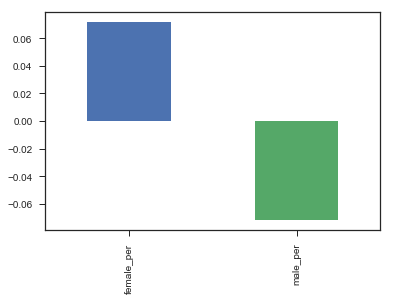

In [26]:
print(full.corr()['sat_score'][['female_per', 'male_per']])
full.corr()['sat_score'][['female_per', 'male_per']].plot.bar()

### Race influence

We have the data of percentage from four races (white, black, asian, hispanic). Let's find out how they are affecting the __sat_score__. 

I don't judge too much on races, just providing the facts. 
Findings:

- Asian and White percentages have positve correlation with the __sat_score__, whereas Black and Hispanic percentages have negative correlations with the __sat_score__.
- Asian students has the highest positve correlation among the four groups. 
- Hispanic students has the highest negative correlations among the four groups.

In [27]:
full.corr()['sat_score'][['white_per', 'black_per', 'asian_per', 'hispanic_per']]

white_per       0.168373
black_per      -0.064892
asian_per       0.191027
hispanic_per   -0.102325
Name: sat_score, dtype: float64

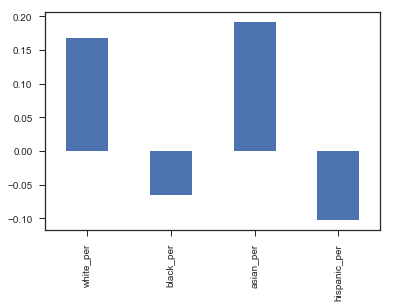

In [28]:
full.corr()['sat_score'][['white_per', 'black_per', 'asian_per', 'hispanic_per']].plot.bar(color = 'b')

### Atittude of respondents' influence

Now let's see how students', parents', and teachers' ratings influence the SAT scores of the school.

Findings:
- Students' ratings have a strong positive correlation to the SAT results. It might be due to students have a better understanding of their schools' performance.
- Parents' ratings also have a positive correlation to the SAT results.
- Teachers' ratings have a negative correlation which is interesting.

In [29]:
# rr_s students' ratings
# rr_p parents' ratings
# rr_t teachers' ratings
full.corr()['sat_score'][['rr_s', 'rr_p', 'rr_t']]

rr_s    0.283358
rr_p    0.057937
rr_t   -0.056380
Name: sat_score, dtype: float64

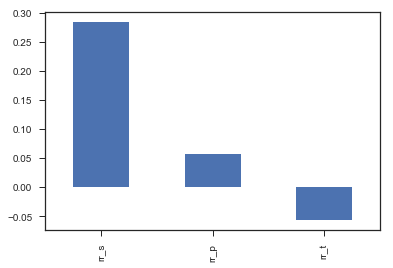

In [30]:
# visulize the correlations of respondents' ratings to the SAT scores
full.corr()['sat_score'][['rr_s', 'rr_p', 'rr_t']].plot(kind = 'bar', color = 'b')

### Foreign language speaker differences

Foreign language speaker means that English is not their first language. In other words, they are English language learners.


-0.13515582997474967


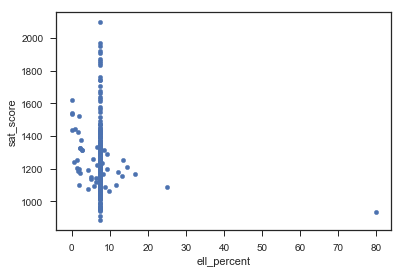

In [31]:
print(full.corr()['sat_score']['ell_percent'])
full.plot.scatter(x='ell_percent', y='sat_score')

## Setting the context

### Map
We'll map out the positions of the schools, which will give us a better visualization.

This is done by:
1. Setup a map centered on NYC.
2. Add a marker for each school on the map.
3. Display the map.

In [32]:
import folium
from folium import plugins

schools_map = folium.Map(location = [40.7425, -73.9250],
                        zoom_start = 10)
marker_cluster = plugins.MarkerCluster().add_to(schools_map)
full["school_name"].fillna("Missing", inplace = True)
full["DBN"].fillna("Missing", inplace = True)
for row in full.iterrows():
    folium.Marker(location = [row[1]['latitude'], row[1]['longitude']],
                  popup = "{}".format(row[1]['DBN'])).add_to(marker_cluster)
# schools_map.createmap('schools.html')
schools_map


Let's use a heatmap to better visualize the assembly of schools in this area.

In [33]:
schools_heatmap = folium.Map(location=[full['latitude'].mean(), full['longitude'].mean()], zoom_start=10)
schools_heatmap.add_children(plugins.HeatMap([[row["latitude"], row["longitude"]] for name, row in full.iterrows()]))
schools_heatmap.save("generated_maps/heatmap.html")
schools_heatmap

## District level mapping

We can investigate the SAT results at district level, by:

- Grouping __full__ dataset by district
- Computing the average of each column for each school district
- Converting the 'school_dist' field to remvoe leading 0s, so we can match our geographic district data.



In [34]:
district_data = full.groupby("school_dist").agg(np.mean)
district_data.reset_index(inplace=True)
district_data["school_dist"] = district_data["school_dist"].apply(lambda x: str(int(x)))


In [35]:

def show_district_map(col, df):
    geo_path = 'data/school_districts.geojson'
    districts = folium.Map(location=[full['latitude'].mean(), full['longitude'].mean()], zoom_start=10.5)
    districts.choropleth(
        geo_data=geo_path,
        data=df,
        columns=['school_dist', col],
        key_on='feature.properties.school_dist',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
    )
#     folium.GeoJson(geo_path, name = 'geojson').add_to(districts)
    districts.save("generated_maps/{}.html".format(col))
    return districts

districts = show_district_map("sat_score", district_data)
from IPython.display import IFrame
IFrame('generated_maps/sat_score.html', width=1000, height=400)

Now we can clearly seen on the distribution of SAT scores in the NYC. Dark green areas on the map indicate high average scores. The color close to yellow indicates low average SAT score areas.